In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

env_var = os.environ
os.environ["LACE_REPO"] = "/nfs/pic.es/user/l/lcabayol/DESI/LaCE"
os.environ["LACE_MANAGER_REPO"] = "/nfs/pic.es/user/l/lcabayol/DESI/LaCE_manager"

In [3]:
# make pretty plots
import matplotlib
import matplotlib.pyplot as plt

from lace.emulator_nn.emulator_train import emulator_train

font = {'size'   : 14}
matplotlib.rc('font', **font)
plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams["font.family"] = "STIXGeneral"

 /data/astro/scratch/lcabayol/anaconda3/envs/DESIenv6/lib/python3.10/site-packages/lace-1.0.1-py3.10.egg/lace/emulator/pd_archive.py:210: SyntaxWarning:"is" with a literal. Did you mean "=="?
 /data/astro/scratch/lcabayol/anaconda3/envs/DESIenv6/lib/python3.10/site-packages/lace-1.0.1-py3.10.egg/lace/emulator/pd_archive.py:210: SyntaxWarning:"is" with a literal. Did you mean "=="?
 /data/astro/scratch/lcabayol/anaconda3/envs/DESIenv6/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [4]:
Nsim=30
emuparams = ['Delta2_p', 'n_p','mF', 'sigT_Mpc', 'gamma', 'kF_Mpc']
emulator = emulator_train(emuparams, zmax=4.5, Nsim=30, nepochs=0, step_size=75, postprocessing='3A', initial_weights=None, list_archives=['data_av_all'], ndeg=9)





start the training of the emulator
Training network on 1650
Emualtor trained in 7.62939453125e-06 seconds


In [5]:

coeffs = np.loadtxt('fractional_errors/poly_coefficients/coefficients/coeffs_avaxesphases.txt').reshape(30,11,7)
coeffs_error = np.loadtxt('fractional_errors/poly_coefficients/coefficients/coeffserr_avaxesphases.txt').reshape(30,11,7)



In [6]:
kMpc = emulator.log_KMpc.cpu().numpy()

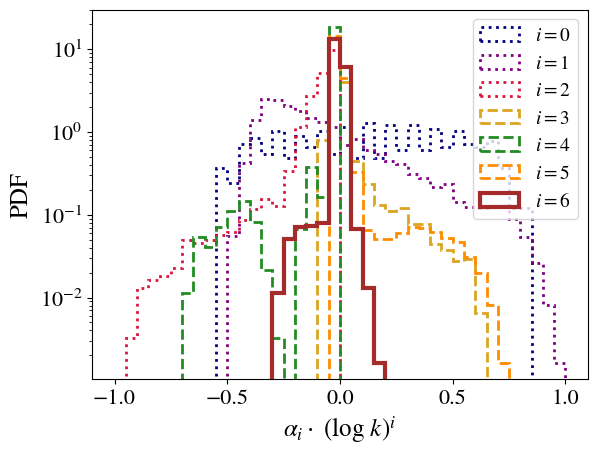

In [15]:
colors = ['navy','purple','crimson','goldenrod','forestgreen','darkorange','brown']
lws = [2,2,2,2,2,2,3]
#lss = ['--','--','--','-','-','-','-']
lss = [':',':',':','--','--','--','-']

for i in range(7):
    plt.hist((coeffs[:,:,i].flatten()[:,None]*kMpc[None,:]**i).flatten(), density=True, histtype = 'step', label = '$i=%s$'%i, bins = 40, color = colors[i], lw = lws[i], range = (-1,1), ls =lss[i])
plt.legend()
plt.xlabel(r'$\alpha_i\cdot$ (log $k{\rm )}^i$', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(r'PDF', fontsize = 18)

plt.yscale('log')

plt.savefig('coeffs_distribution.pdf', bbox_inches='tight')

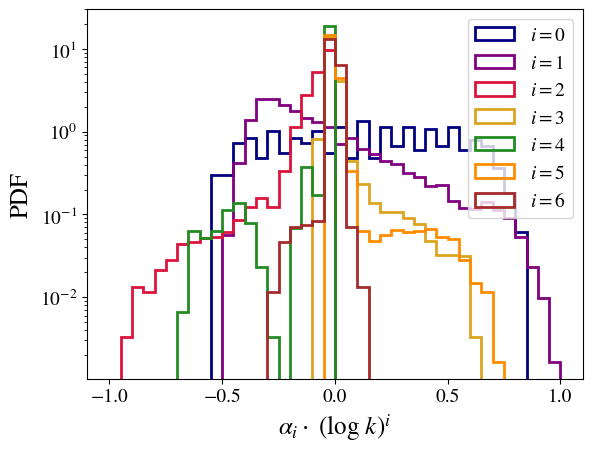

In [16]:
colors = ['navy','purple','crimson','goldenrod','forestgreen','darkorange','brown']
for i in range(7):
    plt.hist((coeffs[:,:,i].flatten()[:,None]*kMpc[None,:]**i).flatten(), density=True, histtype = 'step', label = '$i=%s$'%i, bins = 40, color = colors[i], lw = 2, range = (-1,1))
plt.legend()
plt.xlabel(r'$\alpha_i\cdot$ (log $k{\rm )}^i$', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel(r'PDF', fontsize = 18)

plt.yscale('log')

#plt.savefig('coeffs_distribution.pdf', bbox_inches='tight')